<a href="https://colab.research.google.com/github/sauravakolia/Fastai2/blob/master/01_matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# #export
# TEST = 'test'

In [2]:
# !python notebook2script.py 00_exports.ipynb


In [3]:
# import json
# d = json.load(open('00_exports.ipynb','r'))['cells']

In [4]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [5]:
 !pip install fire

     |████████████████████████████████| 81kB 2.1MB/s 
  Created wheel for fire: filename=fire-0.3.1-py2.py3-none-any.whl size=111005 sha256=4182815e719f4156b3fb80e0814545a22f78c06800f2acb8a87cdcbc559af8bb
  Stored in directory: /root/.cache/pip/wheels/c1/61/df/768b03527bf006b546dce284eb4249b185669e65afc5fbb2ac
Successfully built fire


In [6]:
!git clone https://github.com/sauravakolia/Fastai2.git

Cloning into 'Fastai2'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 33 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (33/33), done.


In [7]:
import sys
sys.path.append('/content/Fastai2/')

In [8]:
#export
import operator
def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')


In [9]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [10]:
path = datasets.download_data(MNIST_URL, ext='.gz');
path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [11]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [12]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [13]:
assert n==y_train.shape[0]==50000
test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [14]:
mpl.rcParams['image.cmap'] = 'gray'

In [15]:
img = x_train[0]

In [16]:
img.shape

torch.Size([784])

In [17]:
img.view(28,28).type()

'torch.FloatTensor'

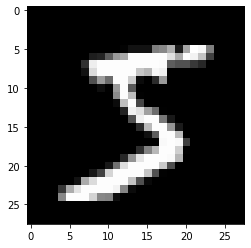

In [18]:
plt.imshow(img.view(28,28))

In [19]:
weights = torch.randn(784,10)

In [20]:
bias = torch.zeros(10)

Matrix Multiplication

In [21]:
def matmul(a,b):
  ar,ac=a.shape
  br,bc=b.shape
  assert ac==br
  c=torch.zeros(ar,bc)

  for i in range(ar):
    for j in range(bc):
      for k in range(ac):
        c[i,j]+=a[i,k]*b[k,j]
  return c      

In [22]:
m1 = x_valid[:5]
m2 = weights

In [23]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [24]:
%time t1=matmul(m1, m2)


CPU times: user 749 ms, sys: 30 µs, total: 749 ms
Wall time: 770 ms


In [25]:
t1.shape

torch.Size([5, 10])

In [26]:
len(x_train)

50000

In [27]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m


tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


**fabineous form**


In [28]:
(m*m).sum().sqrt()

tensor(16.8819)

Element wise

In [29]:
def matmul(a,b):
  ar,ac=a.shape
  br,bc=b.shape
  assert ac==br
  c=torch.zeros(ar,bc)

  for i in range(ar):
    for j in range(bc):
        c[i,j]=(a[i,:]*b[:,j]).sum()
  return c      

In [30]:
%timeit -n 10 _=matmul(m1, m2)


10 loops, best of 3: 1.14 ms per loop


In [31]:
#export
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [32]:
test_near(t1,matmul(m1, m2))


Broadcasting

In [33]:
c = tensor([10.,20,30]); c


tensor([10., 20., 30.])

In [34]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [35]:
m.shape,c.shape


(torch.Size([3, 3]), torch.Size([3]))

In [36]:
t=c.expand_as(m)

In [37]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [38]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [39]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [40]:
c.unsqueeze(1)


tensor([[10.],
        [20.],
        [30.]])

In [41]:
c.unsqueeze(-1)


tensor([[10.],
        [20.],
        [30.]])

In [42]:
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape,c.unsqueeze(-1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]), torch.Size([3, 1]))

In [43]:
c.shape,c[None].shape,c[None:].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3]))

In [44]:
c[None].expand_as(m)

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [45]:
c[...,None]

tensor([[10.],
        [20.],
        [30.]])

In [46]:
c[...,None].shape

torch.Size([3, 1])

In [47]:
c[None,...].shape

torch.Size([1, 3])

In [48]:
def matmul(a,b):
  ar,ac=a.shape
  br,bc=b.shape
  assert ac==br
  c=torch.zeros(ar,bc)

  for i in range(ar):
    c[i]=(a[i].unsqueeze(-1)*b).sum(dim=0)
  return c      

In [49]:
%timeit -n 10 _=matmul(m1, m2)


10 loops, best of 3: 585 µs per loop


In [50]:
test_near(t1, matmul(m1, m2))


Einstein summation

In [51]:
def matmul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [52]:
matmul(m1,m2)

tensor([[  9.3606, -10.9093,   1.9454,   0.7784,  -5.9087,  -6.6770,   0.7871,
         -17.1980,  13.6073,   2.7205],
        [  8.9195, -20.7508,  -0.6239,   8.4897, -15.3772, -12.6476,  -0.1032,
          -3.2961,  17.2744,   7.1310],
        [  2.8329,  -4.9837,  -2.2790,  -5.5797,  10.9747, -10.2969, -10.6794,
         -13.4465,   2.8389,   9.3250],
        [  5.3329,  -2.0728,  12.4913,   8.8276, -13.9070,   0.9192,  -6.0301,
         -12.4302,   4.5203,  -0.9325],
        [  5.7729,  -5.6905,   6.8194,  -4.2078,  -4.3743, -12.5941,  -7.4609,
          -5.4747,  16.4170,   5.5050]])

In [53]:
%timeit -n 10 _=matmul(m1, m2)

10 loops, best of 3: 136 µs per loop


In [54]:
test_near(t1, matmul(m1, m2))

In [55]:
%timeit -n 10 t2 = m1.matmul(m2)

The slowest run took 5.55 times longer than the fastest. This could mean that an intermediate result is being cached.
10 loops, best of 3: 16.1 µs per loop


In [56]:
t2=m1@m2

In [57]:
test_near(t1, t2)


In [59]:
%cd "/content/Fastai2/"

/content/Fastai2


In [61]:
!python notebook2script.py 01_matmul.ipynb

Traceback (most recent call last):
  File "notebook2script.py", line 74, in <module>
    if __name__ == '__main__': fire.Fire(notebook2script)
  File "/usr/local/lib/python3.6/dist-packages/fire/core.py", line 138, in Fire
    component_trace = _Fire(component, args, parsed_flag_args, context, name)
  File "/usr/local/lib/python3.6/dist-packages/fire/core.py", line 468, in _Fire
    target=component.__name__)
  File "/usr/local/lib/python3.6/dist-packages/fire/core.py", line 672, in _CallAndUpdateTrace
    component = fn(*varargs, **kwargs)
  File "notebook2script.py", line 46, in notebook2script
    if not allFiles: notebook2scriptSingle(fname)
  File "notebook2script.py", line 57, in notebook2scriptSingle
    main_dic = json.load(open(fname,'r',encoding="utf-8"))
FileNotFoundError: [Errno 2] No such file or directory: '01_matmul.ipynb'
